In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

pd.options.display.max_colwidth = 1000

## IMDB

In [86]:
imdb = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
imdb.columns = ['Review', 'Positive']
imdb.head()

,Review,Positive
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1


In [87]:
imdb['Positive'].value_counts()
#positive and negative reviews are balanced in the data

1    386
0    362
Name: Positive, dtype: int64

In [88]:
neg = imdb[imdb['Positive']==0]
pos = imdb[imdb['Positive']==1]

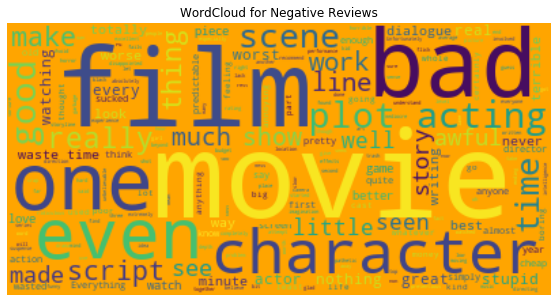

In [89]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="orange").generate(" ".join(neg['Review']))
plt.figure(figsize=(10,5))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Negative Reviews')

plt.show()

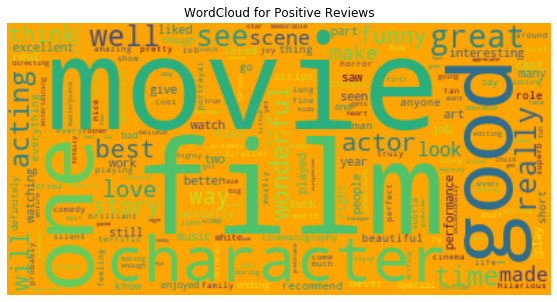

In [90]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="orange").generate(" ".join(pos['Review']))
plt.figure(figsize=(10,5))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Positive Reviews')

plt.show()

In [91]:
#run frequency of both negative and positive keywords and then choose top ones for negative reviews
#remove non-letter string from reviews
review = []

for text in imdb['Review']:
    text = ''.join([c for c in text.lower() if c in ' abcdefghijklmnopqrstuvwxyz'])
    review.append(text)

imdb['review_text'] = review
imdb.head()

,Review,Positive,review_text
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,a very very very slowmoving aimless movie about a distressed drifting young man
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,not sure who was more lost the flat characters or the audience nearly half of whom walked out
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0,attempting artiness with black white and clever camera angles the movie disappointed became even more ridiculous as the acting was poor and the plot and lines almost nonexistent
3,Very little music or anything to speak of.,0,very little music or anything to speak of
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1,the best scene in the movie was when gerardo is trying to find a song that keeps running through his head


In [92]:
#take off stopwords from negative reviews 
no_stopwords = []
for text in imdb['review_text']:
    text = ' '.join([word for word in text.split() if word not in ('the', 'a', 'is', 'of',
                                                                   'for', 'in', 'with', 'not',
                                                                   'and','this', 'to', 'it', 'i',
                                                                   'was', 'movie', 'that', 'film',
                                                                   'but', 'as', 'its', 'one', 'you',
                                                                   'on', 'are', 'about', 'at',
                                                                   'all', 'an')])
    no_stopwords.append(text)

imdb['review_text_nostopwords'] = no_stopwords
imdb.head()

,Review,Positive,review_text,review_text_nostopwords
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,a very very very slowmoving aimless movie about a distressed drifting young man,very very very slowmoving aimless distressed drifting young man
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,not sure who was more lost the flat characters or the audience nearly half of whom walked out,sure who more lost flat characters or audience nearly half whom walked out
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0,attempting artiness with black white and clever camera angles the movie disappointed became even more ridiculous as the acting was poor and the plot and lines almost nonexistent,attempting artiness black white clever camera angles disappointed became even more ridiculous acting poor plot lines almost nonexistent
3,Very little music or anything to speak of.,0,very little music or anything to speak of,very little music or anything speak
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1,the best scene in the movie was when gerardo is trying to find a song that keeps running through his head,best scene when gerardo trying find song keeps running through his head


In [94]:
words = imdb['review_text_nostopwords'].str.cat(sep=' ')
lst = list(words.split(' '))
df = pd.DataFrame(lst)
df.columns = ['review_word']
freq = pd.DataFrame(df['review_word'].value_counts())
#freq[freq['review_word'] > 5]
freq.head()

,review_word
bad,67
very,65
just,63
so,60
good,56


In [123]:
imdb = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
imdb.columns = ['Review', 'Positive']
#***Hobson: should we choose keywords from both pos and neg sides or one side only? This can really
#           affect sensitivity and specificity as the results shown below. 

#***        what's the appropriate way to choose keywords? and to choose how many keywords is reasonable? 

#try pos + neg keytwords 
#keywords = ['good', 'bad', 'great', 'best', 'wonderful', 'awful', 'little', 'never', 
            #'funny', 'stupid', 'waste', 'terrible', 'enjoyed', 'love', 'interesting',
            #'annoying', 'least', 'cheap', 'excellent']

#try pos keywords only
#keywords = ['good', 'great', 'best', 'wonderful', 'funny', 'love', 'interesting',
            #'excellent', 'beautiful', 'enjoyed']
    
#try neg keywords only 
#keywords = ['bad', 'sucked', 'awful', 'sucked',
            #'stupid', 'waste', 'terrible', 'nothing', 'worst', 
            #'least', 'diappointed', 'cheap', 'boring', 'garbage',
            #'little', 'trash']

#try keytwords from linear regression
#keywords = ['hard', 'hour', 'should have', 'waste', 'havent', 'worth seeing', 'could have been', 
            #'great', 'little', 'bored', 'surprisingly', 'cheap', 'incredibly',
            #'trash', 'sucked', 'disappointed']

for key in keywords:
    imdb[str(key)] = imdb['Review'].str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
#imdb.head()

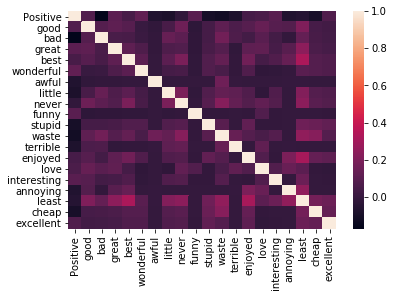

In [119]:
sns.heatmap(imdb.corr())

plt.show()

### Model 1: Using Pos + Neg Features

In [161]:
imdb = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
imdb.columns = ['Review', 'Positive']

#try pos + neg keytwords 
keywords = ['good', 'bad', 'great', 'best', 'wonderful', 'awful', 'little', 'never', 
            'funny', 'stupid', 'waste', 'terrible', 'enjoyed', 'love', 'interesting',
            'annoying', 'least', 'cheap', 'excellent']

for key in keywords:
    imdb[str(key)] = imdb['Review'].str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
#imdb.head()

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

data = imdb[keywords]
target = imdb['Positive']

bnb.fit(data, target)

y_pred = bnb.predict(data)


print("Summary for Model 1: Using Pos + Neg Features")
print("--------------------------------------------------------------")
print("Number of mislabeled points out of a total {} points : {}".format(
      data.shape[0], 
      (target != y_pred).sum()
     ))


print("Success rate: {}%".format(
      round(100-(target != y_pred).sum()/data.shape[0]*100, 0)
     ))

print("                                       ")

#confusion matrix 
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp
cm = confusion_matrix(target, y_pred).ravel()
print("Accuracy: {}".format(round((cm[0]+cm[3])/sum(cm),2)))
print("Sensitivity: {}".format(round(cm[3]/(cm[3]+cm[2]),2)))
print("Specificity: {}".format(round(cm[0]/(cm[0]+cm[1]),2)))

print("                                       ")

#use cross validation to check overfitting 
from sklearn.model_selection import cross_val_score

bnb_scores = cross_val_score(bnb, data, target, cv=10)

print("Average cross validation score: {}".format(
      round(sum(bnb_scores)/len(bnb_scores),2)
     ))
print("                                       ")

print("Cross validation scores: {}".format(
      np.around(bnb_scores, 2)
     ))

Summary for Model 1: Using Pos + Neg Features
--------------------------------------------------------------
Number of mislabeled points out of a total 748 points : 301
Success rate: 60.0%
                                       
Accuracy: 0.6
Sensitivity: 0.98
Specificity: 0.19
                                       
Average cross validation score: 0.59
                                       
Cross validation scores: [0.53 0.59 0.57 0.63 0.64 0.59 0.62 0.61 0.51 0.64]


### Model 2: Using Pos Features

In [160]:
imdb = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
imdb.columns = ['Review', 'Positive']

#try pos keywords only
keywords = ['good', 'great', 'best', 'wonderful', 'funny', 'love', 'interesting',
            'excellent', 'beautiful', 'enjoyed']

for key in keywords:
    imdb[str(key)] = imdb['Review'].str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
#imdb.head()

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

data = imdb[keywords]
target = imdb['Positive']

bnb.fit(data, target)

y_pred = bnb.predict(data)


print("Summary for Model 2: Using Pos Features")
print("--------------------------------------------------------------")
print("Number of mislabeled points out of a total {} points : {}".format(
      data.shape[0], 
      (target != y_pred).sum()
     ))


print("Success rate: {}%".format(
      round(100-(target != y_pred).sum()/data.shape[0]*100, 0)
     ))

print("                                       ")

#confusion matrix 
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp
cm = confusion_matrix(target, y_pred).ravel()
print("Accuracy: {}".format(round((cm[0]+cm[3])/sum(cm),2)))
print("Sensitivity: {}".format(round(cm[3]/(cm[3]+cm[2]),2)))
print("Specificity: {}".format(round(cm[0]/(cm[0]+cm[1]),2)))

print("                                       ")

#use cross validation to check overfitting 
from sklearn.model_selection import cross_val_score

bnb_scores = cross_val_score(bnb, data, target, cv=10)

print("Average cross validation score: {}".format(
      round(sum(bnb_scores)/len(bnb_scores),2)
     ))
print("                                       ")

print("Cross validation scores: {}".format(
      np.around(bnb_scores, 2)
     ))

Summary for Model 2: Using Pos Features
--------------------------------------------------------------
Number of mislabeled points out of a total 748 points : 303
Success rate: 59.0%
                                       
Accuracy: 0.59
Sensitivity: 0.27
Specificity: 0.94
                                       
Average cross validation score: 0.59
                                       
Cross validation scores: [0.54 0.57 0.64 0.57 0.63 0.56 0.68 0.59 0.59 0.55]


In [157]:
bnb_scores

array([0.53947368, 0.56578947, 0.64      , 0.57333333, 0.62666667,
       0.56      , 0.67567568, 0.59459459, 0.59459459, 0.55405405])

### Model 3: Using Neg Features

In [162]:
imdb = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
imdb.columns = ['Review', 'Positive']

#try neg keywords only 
keywords = ['bad', 'sucked', 'awful', 'sucked',
            'stupid', 'waste', 'terrible', 'nothing', 'worst', 
            'least', 'diappointed', 'cheap', 'boring', 'garbage',
            'little', 'trash']

for key in keywords:
    imdb[str(key)] = imdb['Review'].str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
#imdb.head()

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

data = imdb[keywords]
target = imdb['Positive']

bnb.fit(data, target)

y_pred = bnb.predict(data)


print("Summary for Model 3: Using Neg Features")
print("--------------------------------------------------------------")
print("Number of mislabeled points out of a total {} points : {}".format(
      data.shape[0], 
      (target != y_pred).sum()
     ))


print("Success rate: {}%".format(
      round(100-(target != y_pred).sum()/data.shape[0]*100, 0)
     ))

print("                                       ")

#confusion matrix 
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp
cm = confusion_matrix(target, y_pred).ravel()
print("Accuracy: {}".format(round((cm[0]+cm[3])/sum(cm),2)))
print("Sensitivity: {}".format(round(cm[3]/(cm[3]+cm[2]),2)))
print("Specificity: {}".format(round(cm[0]/(cm[0]+cm[1]),2)))

print("                                       ")

#use cross validation to check overfitting 
from sklearn.model_selection import cross_val_score

bnb_scores = cross_val_score(bnb, data, target, cv=10)

print("Average cross validation score: {}".format(
      round(sum(bnb_scores)/len(bnb_scores),2)
     ))
print("                                       ")

print("Cross validation scores: {}".format(
      np.around(bnb_scores, 2)
     ))

Summary for Model 3: Using Neg Features
--------------------------------------------------------------
Number of mislabeled points out of a total 748 points : 291
Success rate: 61.0%
                                       
Accuracy: 0.61
Sensitivity: 0.98
Specificity: 0.22
                                       
Average cross validation score: 0.61
                                       
Cross validation scores: [0.55 0.59 0.56 0.63 0.63 0.57 0.65 0.62 0.62 0.66]


### Model 4: Using Linear Regression Features

In [164]:
imdb = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
imdb.columns = ['Review', 'Positive']

#try keytwords from linear regression
keywords = ['hard', 'hour', 'should have', 'waste', 'havent', 'worth seeing', 'could have been', 
            'great', 'little', 'bored', 'surprisingly', 'cheap', 'incredibly',
            'trash', 'sucked', 'disappointed']

for key in keywords:
    imdb[str(key)] = imdb['Review'].str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
#imdb.head()

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

data = imdb[keywords]
target = imdb['Positive']

bnb.fit(data, target)

y_pred = bnb.predict(data)


print("Summary for Model 4: Using Features from Linear Regression")
print("--------------------------------------------------------------")
print("Number of mislabeled points out of a total {} points : {}".format(
      data.shape[0], 
      (target != y_pred).sum()
     ))


print("Success rate: {}%".format(
      round(100-(target != y_pred).sum()/data.shape[0]*100, 0)
     ))

print("                                       ")

#confusion matrix 
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp
cm = confusion_matrix(target, y_pred).ravel()
print("Accuracy: {}".format(round((cm[0]+cm[3])/sum(cm),2)))
print("Sensitivity: {}".format(round(cm[3]/(cm[3]+cm[2]),2)))
print("Specificity: {}".format(round(cm[0]/(cm[0]+cm[1]),2)))

print("                                       ")

#use cross validation to check overfitting 
from sklearn.model_selection import cross_val_score

bnb_scores = cross_val_score(bnb, data, target, cv=10)

print("Average cross validation score: {}".format(
      round(sum(bnb_scores)/len(bnb_scores),2)
     ))
print("                                       ")

print("Cross validation scores: {}".format(
      np.around(bnb_scores, 2)
     ))

Summary for Model 4: Using Features from Linear Regression
--------------------------------------------------------------
Number of mislabeled points out of a total 748 points : 327
Success rate: 56.0%
                                       
Accuracy: 0.56
Sensitivity: 0.98
Specificity: 0.11
                                       
Average cross validation score: 0.55
                                       
Cross validation scores: [0.55 0.55 0.55 0.53 0.57 0.55 0.59 0.51 0.57 0.57]


In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[ 70, 292],
       [  9, 377]])

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=3, max_df=0.4, ngram_range=(1,3))

In [38]:
X = tfidf.fit_transform(imdb['review_text_nostopwords'])

df_tfidf = pd.DataFrame(X.todense())
df_tfidf.columns = tfidf.get_feature_names()
df_tfidf.head()

,ability,absolutely,acted,acting,acting bad,acting from,action,actor,actors,actress,...,wrong,year,years,yes,yet,youll,young,your,your time,youre
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.325184,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.194566,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [81]:
score = imdb['Positive']

lr.fit(df_tfidf, score)
coef = pd.Series(lr.coef_, index=df_tfidf.columns)

text = pd.DataFrame(coef.sort_values())
text.reset_index(level=0, inplace=True)
text.columns = [['word', 'coef']]
text.head()

,word,coef
0,every single,-3.930380e+13
1,while,-3.025756e+13
2,have been,-2.875417e+13
3,next,-2.807984e+13
4,turn,-2.676384e+13
